# **1. Perkenalan Dataset**

## 📁 Sumber Dataset
Dataset ini diperoleh dari Kaggle:  
🔗 [Social Media and Mental Health Balance Dataset](https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance)

## 📝 Deskripsi Singkat
Dataset ini mengeksplorasi hubungan antara penggunaan media sosial dan kesehatan mental. Dataset ini mencakup informasi mengenai waktu layar pengguna, kualitas tidur, tingkat stres, frekuensi olahraga, dan indeks kebahagiaan. Tujuannya adalah untuk memahami bagaimana kebiasaan digital dan faktor gaya hidup memengaruhi kesejahteraan secara keseluruhan dan keseimbangan emosional.

## 🔢 Informasi Umum
- **Jumlah Data (Baris)**: 
- **Jumlah Fitur (Kolom)**: 
- **Jenis Analisis**: Klasifikasi Biner   
(Apakah seseorang memiliki keseimbangan mental yang baik: 1 = Ya, 0 = Tidak)


   

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [1]:
# Load the dataset
df = pd.read_csv("C:\\Users\\nazha\\OneDrive\\Dokumen\\Proyek Asah_Muhammad Nazhan Azka_ ML\\Submission ML Terakhir\\Eksperimen_SML_Nazhan-Azka\\namadataset_raw\\Mental_Health_and_Social_Media_Balance.csv")


NameError: name 'pd' is not defined

Menampilkan Informasi Dasar tentang Dataset

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


Melihat 5 Baris Pertama dari Dataset

In [4]:
# Display the first few rows of the dataset
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


# **4. Exploratory Data Analysis (EDA)**


Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Menampilkan Nama Kolom Dataset

In [5]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')


1. User_ID: ID pengguna (biasanya bukan fitur untuk model, bisa dianggap sebagai identifier).

2. Age: Usia pengguna (numerik).

3. Gender: Jenis kelamin pengguna (kategorikal, bisa diubah menjadi numerik).

4. Daily_Screen_Time(hrs): Waktu penggunaan layar harian (numerik).

5. Sleep_Quality(1-10): Kualitas tidur (numerik).

6. Stress_Level(1-10): Tingkat stres (numerik).

7. Days_Without_Social_Media: Jumlah hari tanpa media sosial (numerik).

8. Exercise_Frequency(week): Frekuensi olahraga per minggu (numerik).

9. Social_Media_Platform: Platform media sosial yang digunakan (kategorikal).

10. Happiness_Index(1-10): Indeks kebahagiaan (numerik).

2. Mengecek Nilai yang Hilang Setelah Pembersihan

In [6]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

3. Menampilkan Statistik Deskriptif

In [7]:
# Summary statistics for numerical columns
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


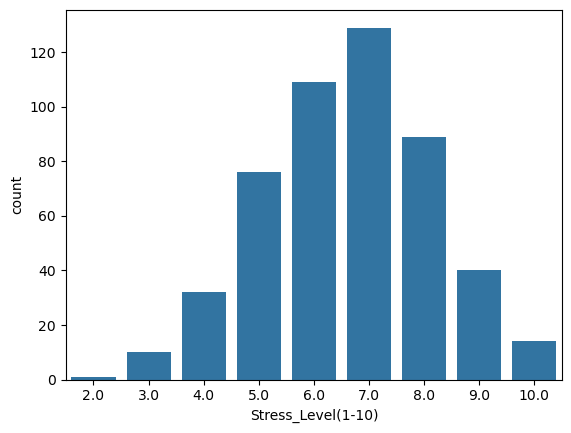

In [8]:
sns.countplot(x="Stress_Level(1-10)", data=df)
plt.show()

Menampilkan pie Chart pada sleep quality

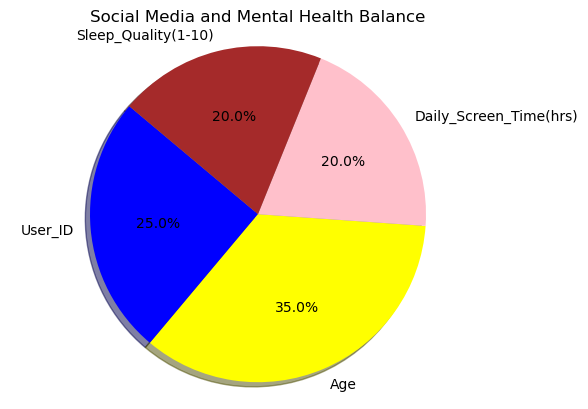

In [9]:
labels = ['User_ID', 'Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)']
sizes = [25, 35, 20, 20]
colors = ['blue', 'yellow', 'pink', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Social Media and Mental Health Balance')
plt.axis('equal')
plt.show()


Create lineplot

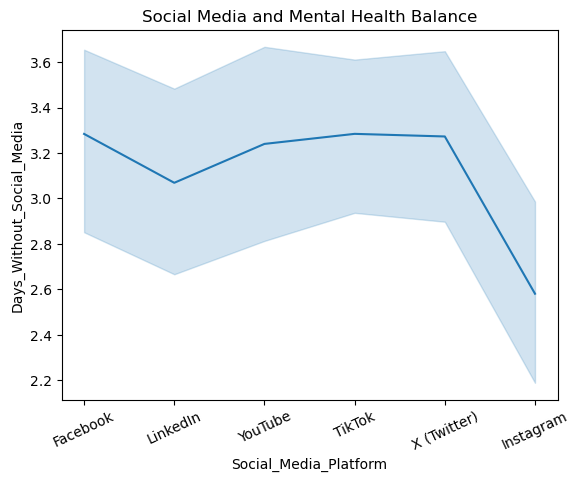

In [10]:
sns.lineplot(x="Social_Media_Platform",y="Days_Without_Social_Media",data=df)
plt.title("Social Media and Mental Health Balance")
plt.xlabel("Social_Media_Platform")
plt.ylabel("Days_Without_Social_Media")
plt.xticks(rotation = 25)

plt.show()

Create Pair Plot

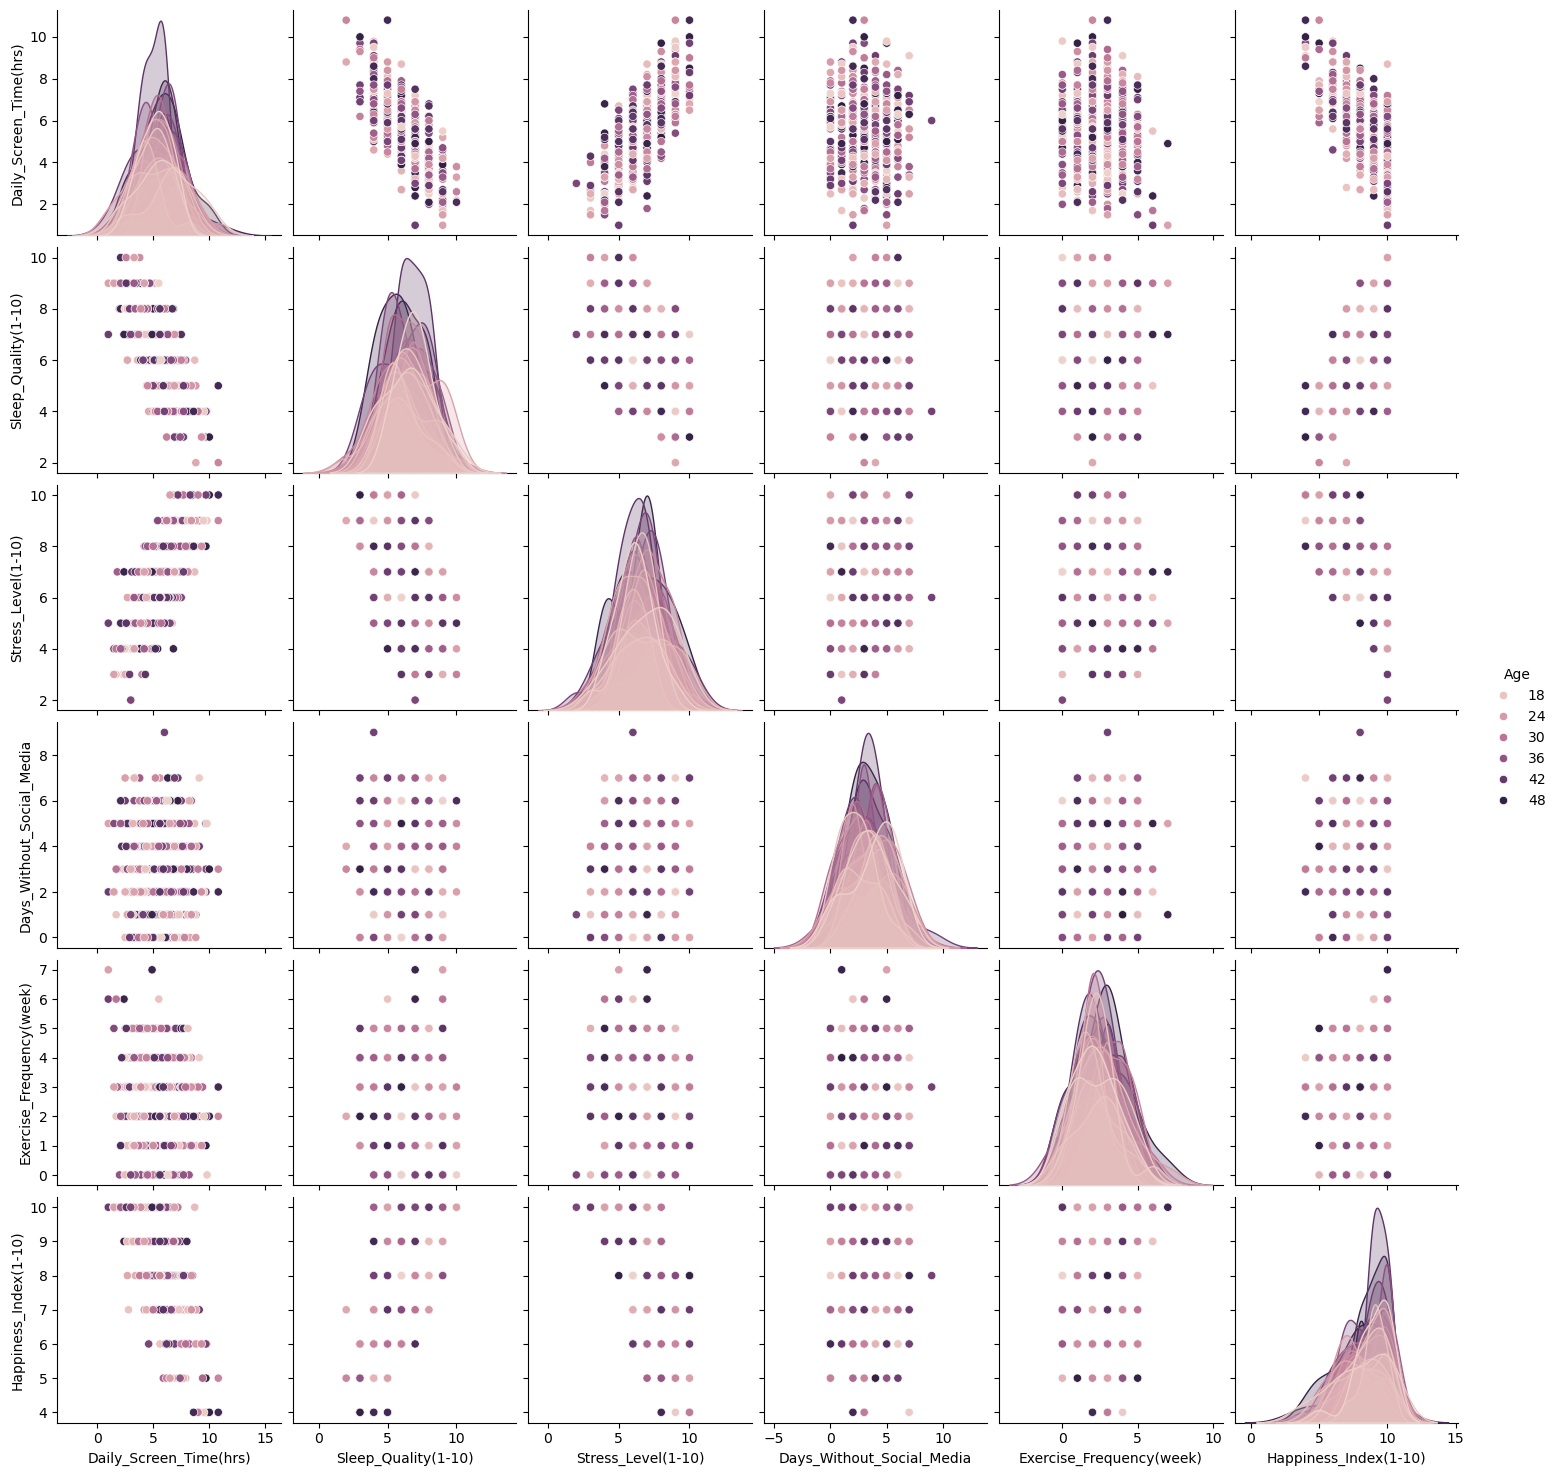

In [11]:
sns.pairplot(df,hue="Age")
plt.show()

Create bar plot

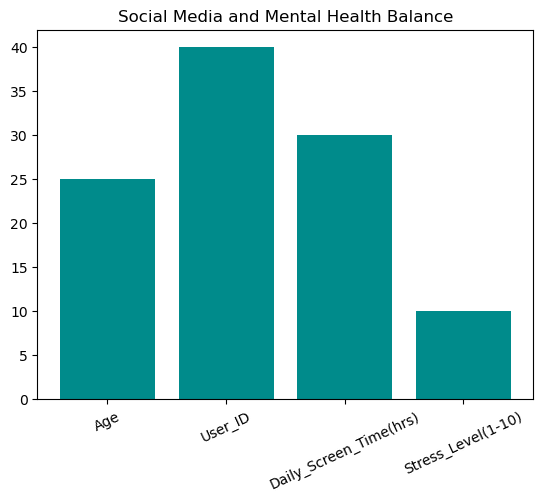

In [12]:
categories = ['Age', 'User_ID', 'Daily_Screen_Time(hrs)', 'Stress_Level(1-10)']
values = [25, 40, 30, 10]
plt.bar(categories, values, color='darkcyan')
plt.title('Social Media and Mental Health Balance')
plt.xticks(rotation = 25)

# Show the plot
plt.show()

Create HeatMap

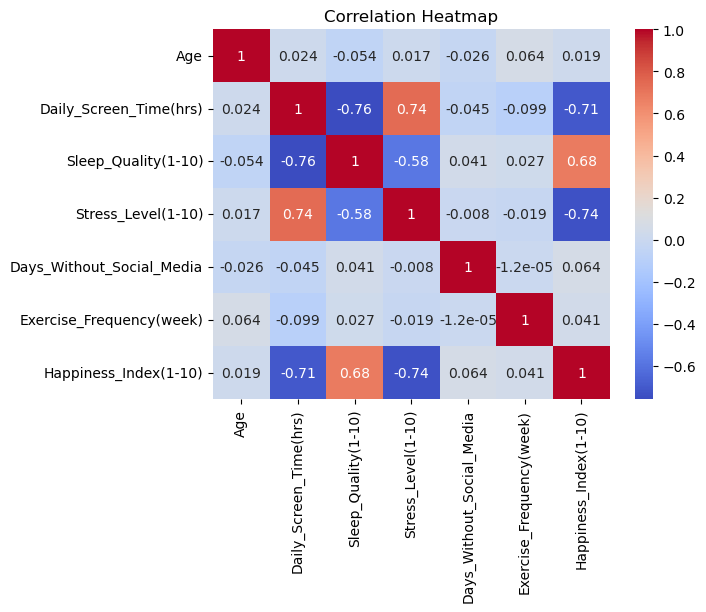

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


# **5. Data Preprocessing**

1. Menampilkan Jumlah Nilai Unik di Setiap Kolom

Tujuan:

Mengidentifikasi dan menghitung jumlah nilai unik yang ada di setiap kolom dalam dataset. Hal ini penting untuk memahami seberapa bervariasinya data dalam setiap kolom dan untuk memutuskan langkah selanjutnya seperti pembersihan data atau encoding.

In [14]:
unique_values = df.nunique()
print("Jumlah Nilai Unik di Setiap Kolom:")
print(unique_values)

Jumlah Nilai Unik di Setiap Kolom:
User_ID                      500
Age                           34
Gender                         3
Daily_Screen_Time(hrs)        82
Sleep_Quality(1-10)            9
Stress_Level(1-10)             9
Days_Without_Social_Media      9
Exercise_Frequency(week)       8
Social_Media_Platform          6
Happiness_Index(1-10)          7
dtype: int64


2. Deteksi Outlier Menggunakan Metode IQR (Interquartile Range)

Tujuan:

Mendeteksi nilai-nilai outlier di setiap kolom numerik menggunakan metode IQR (Interquartile Range). Outlier adalah nilai yang berada jauh di luar rentang distribusi normal data, dan penting untuk mengidentifikasinya karena dapat memengaruhi analisis statistik atau model prediktif.

In [15]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    
    for column in columns:
        # Menghitung Q1 dan Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Menghitung IQR
        IQR = Q3 - Q1
        
        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mendeteksi outlier
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Mendeteksi outlier
outliers = detect_outliers_iqr(df, numerical_columns)

# Menampilkan hasil deteksi outlier
for column, outlier_data in outliers.items():
    print(f"Outliers di kolom {column}:\n{outlier_data}\n")


Outliers di kolom Age:
Empty DataFrame
Columns: [User_ID, Age, Gender, Daily_Screen_Time(hrs), Sleep_Quality(1-10), Stress_Level(1-10), Days_Without_Social_Media, Exercise_Frequency(week), Social_Media_Platform, Happiness_Index(1-10)]
Index: []

Outliers di kolom Daily_Screen_Time(hrs):
    User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
248    U249   46  Female                    10.8                  5.0   
325    U326   27    Male                    10.8                  2.0   

     Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
248                10.0                        2.0                       3.0   
325                 9.0                        3.0                       2.0   

    Social_Media_Platform  Happiness_Index(1-10)  
248             Instagram                    4.0  
325           X (Twitter)                    5.0  

Outliers di kolom Sleep_Quality(1-10):
Empty DataFrame
Columns: [User_ID, Age, Gender, Daily_Scre

3. Fungsi untuk Menghapus Outlier Menggunakan Metode IQR (Interquartile Range)

Deskripsi Proses:

Proses ini bertujuan untuk menghapus data yang dianggap outlier (nilai ekstrem) dalam dataset dengan menggunakan metode Interquartile Range (IQR). 

In [16]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()

    for column in columns:
        # Menghitung Q1 dan Q3
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Menghitung IQR
        IQR = Q3 - Q1
        
        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Menghapus outlier
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Menghapus outlier untuk kolom numerik
df_no_outliers = remove_outliers_iqr(df, numerical_columns)

# Menampilkan beberapa baris pertama setelah penghapusan outlier
print("\nDataset setelah menghapus outlier:")
print(df_no_outliers.head())



Dataset setelah menghapus outlier:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Face

4. Kolom Numerik untuk Deteksi Outlier

Tujuan:

Menentukan kolom-kolom numerik dalam dataset yang akan digunakan untuk mendeteksi outlier. Kolom-kolom numerik ini berisi data yang relevan dalam analisis kesehatan pasien dan dapat dipengaruhi oleh nilai ekstrem (outlier) yang dapat merusak integritas analisis. Deteksi outlier bertujuan untuk memastikan bahwa data yang digunakan dalam analisis atau model lebih bersih dan lebih representatif.

In [17]:
# Menentukan kolom numerik untuk deteksi outlier
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nKolom Numerik untuk Deteksi Outlier:")
print(numerical_columns)


Kolom Numerik untuk Deteksi Outlier:
Index(['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
       'Stress_Level(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Happiness_Index(1-10)'],
      dtype='object')


5. Normalisasi Data Menggunakan StandardScaler

Tujuan:

Proses ini bertujuan untuk menormalkan data fitur menggunakan metode StandardScaler. Normalisasi atau standardisasi fitur sangat penting dalam banyak algoritma pembelajaran mesin karena memastikan bahwa semua fitur memiliki skala yang sama, yang dapat meningkatkan kinerja model dan mempercepat konvergensi. StandardScaler mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

In [18]:
from sklearn.preprocessing import StandardScaler

# Menstandarisasi data numerik
scaler = StandardScaler()
df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])

# Menampilkan beberapa baris pertama setelah normalisasi
print("\nDataset setelah normalisasi:")
print(df_no_outliers.head())



Dataset setelah normalisasi:
  User_ID       Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001  1.110609    Male               -1.431812             0.456739   
1    U002 -0.296948   Other               -0.250567             0.456739   
2    U003 -1.000726   Other                1.107865            -0.202403   
3    U004  0.306291  Female                0.103806             0.456739   
4    U005  0.105211  Female                0.871616            -1.520686   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0           -0.406133                  -0.614094                  1.833163   
1            0.907826                   0.999941                  0.404162   
2            0.250847                  -1.152106                  0.404162   
3            0.907826                  -1.152106                 -1.024839   
4            0.250847                   0.999941                 -1.024839   

  Social_Media_Platform  Happiness_Index(1-1

In [19]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [20]:
# Menyimpan dataset tanpa outlier ke file CSV di lokasi yang ditentukan
output_path = r'C:\Users\nazha\OneDrive\Dokumen\Proyek Asah_Muhammad Nazhan Azka_ ML\Submission ML Terakhir\Eksperimen_SML_Nazhan-Azka\Mental_Health_and_Social_Media_Balance_No_Outlier.csv'
df_no_outliers.to_csv(output_path, index=False)

# Memberikan pesan bahwa data telah disimpan
print(f"Dataset tanpa outlier telah disimpan sebagai '{output_path}'.")


Dataset tanpa outlier telah disimpan sebagai 'C:\Users\nazha\OneDrive\Dokumen\Proyek Asah_Muhammad Nazhan Azka_ ML\Submission ML Terakhir\Eksperimen_SML_Nazhan-Azka\Mental_Health_and_Social_Media_Balance_No_Outlier.csv'.
